<a href="https://colab.research.google.com/github/mahbubcsedu/interviewcoding/blob/main/segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segment Tree
A good explanation https://leetcode.com/articles/a-recursive-approach-to-segment-trees-range-sum-queries-lazy-propagation/
If it is not available, tushar roy video is a good resource


Using `networkx`, we can visually represent a segment tree for range queries. This code constructs a Segment Tree and visualizes it as a directed graph.

We'll use `networkx` to build the tree structure, adding nodes and edges as we go. The tree will represent a range sum query for simplicity, but you can adapt it for other types of range queries.

### Segment Tree Visualization Code with `networkx`



### Explanation

- **Initialization**: We initialize the Segment Tree with the array and prepare an empty `networkx` directed graph.
- **Build**:
  - **Leaf Nodes**: For each element in `arr`, we add it as a leaf in the `tree` array and label it as "Leaf" with its value.
  - **Parent Nodes**: For each parent node, we calculate the sum and add it to the tree array. Each node is labeled with its calculated sum value, and directed edges are added from parent to left and right children.
- **Visualization**: We use `matplotlib` with `networkx` to visualize the tree. Each node shows the sum it represents, and the edges represent the parent-child relationship.

This code should give you a visual representation of the Segment Tree for the given array. Adjust `nx.spring_layout` or try `nx.shell_layout` for different visual structures.

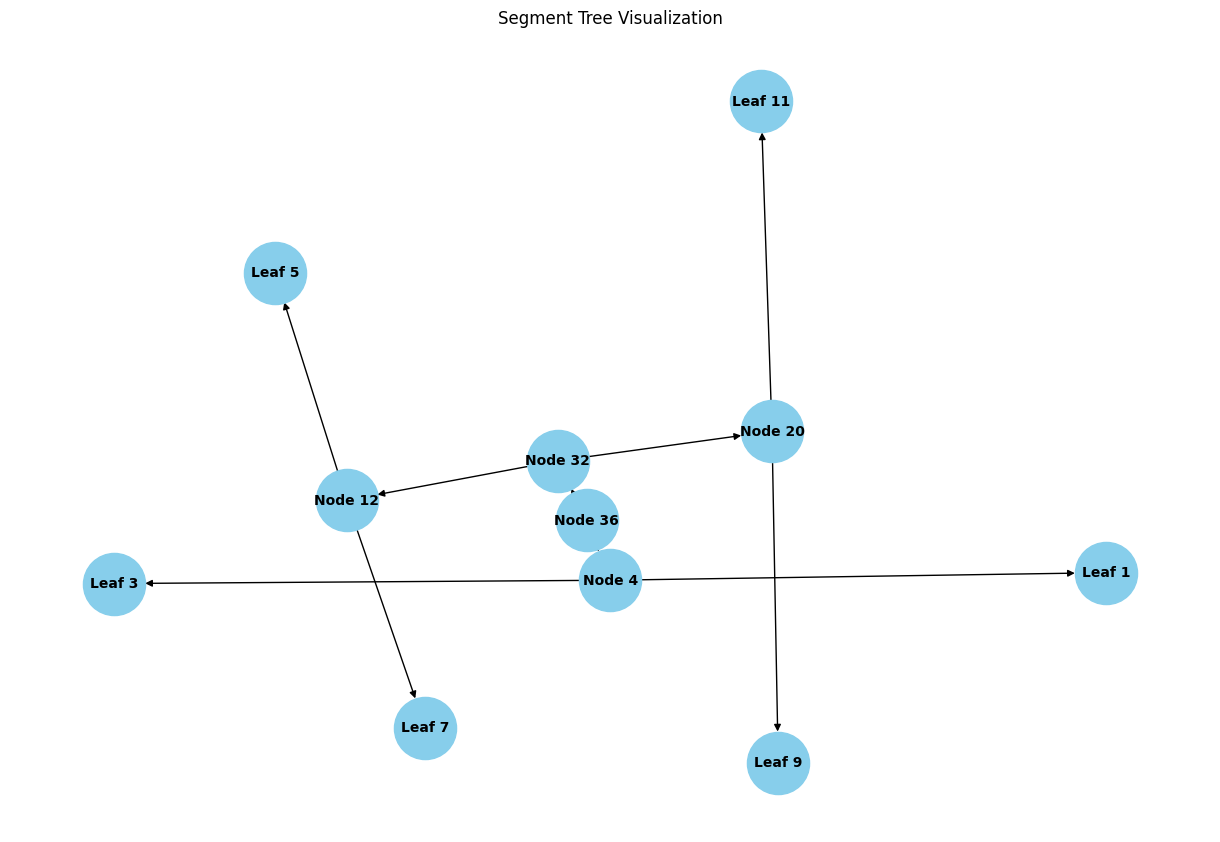

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (2 * self.n)
        self.graph = nx.DiGraph()
        self.build(arr)

    def build(self, arr):
        # Insert leaf nodes in the tree array
        for i in range(self.n):
            self.tree[self.n + i] = arr[i]
            self.graph.add_node(self.n + i, label=f"Leaf {arr[i]}")
        # Build the tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]
            self.graph.add_node(i, label=f"Node {self.tree[i]}")
            self.graph.add_edge(i, 2 * i)         # Connect parent to left child
            self.graph.add_edge(i, 2 * i + 1)     # Connect parent to right child

    def visualize(self):
        pos = nx.spring_layout(self.graph)  # Position the nodes
        labels = nx.get_node_attributes(self.graph, 'label')
        plt.figure(figsize=(12, 8))
        nx.draw(self.graph, pos, with_labels=True, labels=labels, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
        plt.title("Segment Tree Visualization")
        plt.show()

# Example usage
arr = [1, 3, 5, 7, 9, 11]
seg_tree = SegmentTree(arr)
seg_tree.visualize()


Segment Trees are a powerful data structure used primarily for answering range queries and efficiently updating ranges of values. They’re often applied in problems requiring dynamic range updates and queries, such as sum, minimum/maximum, or GCD over a range.

### Segment Tree: Overview

#### Key Concepts
- **Structure**: A Segment Tree is a binary tree where each node represents an interval or segment of an array.
- **Purpose**: Segment Trees allow you to perform range queries and updates in \(O(\log n)\) time.
- **Applications**: Used when you need efficient query and update operations, such as finding a sum or minimum/maximum over a subarray and updating individual elements or ranges.

#### Basic Operations
1. **Build**: Construct the tree from an initial array, typically done in \(O(n)\).
2. **Query**: Retrieve information (sum, min, max) over a specific range.
3. **Update**: Modify elements in a range or a single index and update the tree accordingly.

### Segment Tree Example: Range Sum Query

Suppose we want to answer the sum of elements in a range \([L, R]\) and also update values in our array.

#### 1. Segment Tree Node Structure
Each node in a segment tree represents a range. For example, the root node represents the entire array, while child nodes represent smaller subarrays.

#### 2. Recursive Structure
To answer range queries, each node is split into two child nodes, representing the left and right halves of the current range.

### Segment Tree Implementation (Python)

Here’s a basic implementation of a Segment Tree for range sum queries and updates:

```python
class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (2 * self.n)  # Initialize segment tree array
        # Build the tree
        self.build(arr)
    
    def build(self, arr):
        # Insert leaf nodes in the tree array
        for i in range(self.n):
            self.tree[self.n + i] = arr[i]
        # Build the tree by calculating parents
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]
    
    def update(self, index, value):
        # Update leaf node
        pos = index + self.n
        self.tree[pos] = value
        # Update internal nodes
        while pos > 1:
            pos //= 2
            self.tree[pos] = self.tree[2 * pos] + self.tree[2 * pos + 1]
    
    def range_query(self, left, right):
        # Query the range [left, right)
        left += self.n
        right += self.n
        result = 0
        while left < right:
            if left % 2 == 1:
                result += self.tree[left]
                left += 1
            if right % 2 == 1:
                right -= 1
                result += self.tree[right]
            left //= 2
            right //= 2
        return result

# Usage
arr = [1, 3, 5, 7, 9, 11]
seg_tree = SegmentTree(arr)
print(seg_tree.range_query(1, 4))  # Sum from index 1 to 3, Output: 15
seg_tree.update(2, 6)  # Update index 2 to 6
print(seg_tree.range_query(1, 4))  # Updated sum, Output: 16
```

### Explanation
- **Build Tree**: We initialize the segment tree with an array of size \(2 \times n\). The last \(n\) elements represent leaf nodes (values from `arr`), and the first \(n\) elements represent sums of corresponding ranges.
- **Update**: When updating a leaf, we also update all nodes along its path up to the root.
- **Range Query**: Queries are processed by traversing the nodes covering the range, summing partial results from the left and right subtrees.

### Practice Problems on Segment Tree

Here’s a list of problems that can solidify your understanding of Segment Trees:

1. **Range Sum Query - Mutable**
   - **LeetCode #307**: [Range Sum Query - Mutable](https://leetcode.com/problems/range-sum-query-mutable/)
   - **Objective**: Implement a segment tree for dynamic range sum queries and updates.

2. **Range Minimum Query**
   - **SPOJ**: [RMQSQ - Range Minimum Query](https://www.spoj.com/problems/RMQSQ/)
   - **Objective**: Find the minimum element in a given range with updates.

3. **Dynamic Range Sum Queries**
   - **CSES**: [Dynamic Range Sum Queries](https://cses.fi/problemset/task/1648)
   - **Objective**: Solve range sum queries with updates for a large array.

4. **Interval Product**
   - **SPOJ**: [GSS1 - Can you answer these queries I](https://www.spoj.com/problems/GSS1/)
   - **Objective**: Answer queries to find the maximum sum of contiguous subarrays in a range.

5. **Count of Smaller Numbers After Self**
   - **LeetCode #315**: [Count of Smaller Numbers After Self](https://leetcode.com/problems/count-of-smaller-numbers-after-self/)
   - **Objective**: Use segment trees to count elements smaller than the current element to the right of it.

6. **Reverse Pairs**
   - **LeetCode #493**: [Reverse Pairs](https://leetcode.com/problems/reverse-pairs/)
   - **Objective**: Count pairs where \( i < j \) and \( nums[i] > 2 \times nums[j] \) using a segment tree.

### Solution Walkthrough for Example Problem

Let’s solve **Range Sum Query - Mutable** using a segment tree:

**Problem**: Implement a data structure with methods to update an array and retrieve sum queries over a given range.

```python
class NumArray:
    def __init__(self, nums):
        self.n = len(nums)
        self.tree = [0] * (2 * self.n)
        self.build(nums)
    
    def build(self, nums):
        for i in range(self.n):
            self.tree[self.n + i] = nums[i]
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]
    
    def update(self, index, val):
        pos = index + self.n
        self.tree[pos] = val
        while pos > 1:
            pos //= 2
            self.tree[pos] = self.tree[2 * pos] + self.tree[2 * pos + 1]
    
    def sumRange(self, left, right):
        left += self.n
        right += self.n
        result = 0
        while left <= right:
            if left % 2 == 1:
                result += self.tree[left]
                left += 1
            if right % 2 == 0:
                result += self.tree[right]
                right -= 1
            left //= 2
            right //= 2
        return result
```

### Explanation:
- **Initialization**: The segment tree is built using a bottom-up approach.
- **Update**: Updating an element involves changing the corresponding leaf node and updating all nodes along the path to the root.
- **Range Query**: The sum for a range is computed by combining results from relevant nodes covering the query range.

With this foundational code and list of problems, you should have a strong base to practice and master Segment Trees. Let me know if you'd like a detailed walkthrough for another specific problem!

In [ ]:
import math

def next_power_of_2(a_len):
	# Calculate the height of the tree (minus one).
    stHeight = math.ceil(math.log2(a_len))


    # Calculate the maximum number of leaves a tree of this height can have.
    maxNumLeaves = (2 * (2 ** stHeight)) - 1;
    return maxNumLeaves

def build_segment_tree(A):
	# size = next_power_of_2(len(A))-1
  size = 4 * (len(A))-1
  s_tree = [0 for _ in range(size)]
  construct_tree(s_tree, A, 0, len(A)-1, 0)
  return s_tree
  # size = 4*len(A)-1
	# print(size)

	# s_tree = [0 for _ in range(size)]
	# construct_tree(s_tree, A, 0, len(A)-1, 0)
	# return s_tree


def construct_tree(s_tree, input, start, end, pos):
	if start == end:
		s_tree[pos] = input[start]
		return
	mid = start + (end - start)//2 # integer division, single / for floating point
	# print(mid)

	construct_tree(s_tree, input, start, mid, 2*pos+1)
	construct_tree(s_tree, input, mid+1, end, 2*pos+2)
	s_tree[pos] = max(s_tree[2*pos+1], s_tree[2*pos+2])

def max_range_query(s_tree, low, high, a_len):
	return max_range_query_util(s_tree, 0, a_len, low, high, 0)

def max_range_query_util(s_tree, start, end, qlow, qhigh, cur_node_pos):
	# print(s_tree)
	# print(start, end, qlow, qhigh)
	## be very carefull about this case
	# partial overlap
	# no-overlap- either before or after and return negative infinite, for query range [3,5], [0,2], or [1,2], or [6,6] out or range
	# total overlap - [qlow, qhigh] should overlap the whole range [start, end]. [3, 5] is total overlap with [3,4], [3,5], [4,5] etc
	if qlow > end or qhigh < start:
		# print(cur_node_pos)
		return float('-inf')

	elif qlow <= start and qhigh >= end:
		# print(cur_node_pos)
		return s_tree[cur_node_pos]

	else:
		mid = start + (end-start)//2

		return max(max_range_query_util(s_tree, start, mid, qlow, qhigh, 2*cur_node_pos+1), \
		 max_range_query_util(s_tree, mid+1, end, qlow, qhigh, 2*cur_node_pos+2))

# update value at an index. so, we need index and the new value at that index
#
def update_value(s_tree, input, a_len, index, new_value):
	new_max = max(new_value, input[index])
	input[index]=new_max
	update_value_util(s_tree, 0, a_len, input, new_max, index, 0)
	# print(s_tree)

def update_value_util(s_tree, low, high, input, new_max, index, pos):
	if low > index or index > high :
		return

	# print(pos, low, high, index)
	s_tree[pos] = max(s_tree[pos], new_max)
	# print(s_tree[pos])

	if low >=high:
		return

	mid = (low+high)//2
	# print(low, high, mid)

	update_value_util(s_tree, low, mid, input, new_max, index, 2*pos+1)
	update_value_util(s_tree, mid+1, high, input, new_max, index, 2*pos+2)

	'''       4
          4       2
       3   4    2   1
	-1  3     0  2

after update 0 ->5

		      5
          4       5
       3   4    5   1
	-1  3     5  2
	'''

def main():
	#4, 4, 3, 2, 2,
	input = [-1,3,4,0,2,1]
	t = build_segment_tree(input)
	r = max_range_query(t,2,5,5)
	print(r)
	# print(next_power_of_2(6))
	update_value(t, input, len(input)-1,3,5)
	# print(t)
	r = max_range_query(t,2,5,5)
	print(r)

if __name__ == '__main__':
	main()


4
5


In [ ]:
# prompt: write segment tree update and search

class SegmentTree:
    def __init__(self, arr):
        self.n = len(arr)
        self.tree = [0] * (2 * self.n)
        self.build(arr, 1, 0, self.n - 1)

    def build(self, arr, node, start, end):
        if start == end:
            self.tree[node] = arr[start]
        else:
            mid = (start + end) // 2
            self.build(arr, 2 * node, start, mid)
            self.build(arr, 2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def update(self, index, value):
        self.update_helper(index, value, 1, 0, self.n - 1)

    def update_helper(self, index, value, node, start, end):
        if start == end == index:
            self.tree[node] = value
        else:
            mid = (start + end) // 2
            if index <= mid:
                self.update_helper(index, value, 2 * node, start, mid)
            else:
                self.update_helper(index, value, 2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def search(self, left, right):
        return self.search_helper(left, right, 1, 0, self.n - 1)

    def search_helper(self, left, right, node, start, end):
        if right < start or end < left:
            return 0
        if left <= start and end <= right:
            return self.tree[node]
        mid = (start + end) // 2
        return self.search_helper(left, right, 2 * node, start, mid) + self.search_helper(left, right, 2 * node + 1, mid + 1, end)


## 1696. Jump Game VI

You are given a 0-indexed integer array nums and an integer k.

You are initially standing at index 0. In one move, you can jump at most k steps forward without going outside the boundaries of the array. That is, you can jump from index i to any index in the range [i + 1, min(n - 1, i + k)] inclusive.

You want to reach the last index of the array (index n - 1). Your score is the sum of all nums[j] for each index j you visited in the array.

Return the maximum score you can get.

```python

Example 1:

Input: nums = [1,-1,-2,4,-7,3], k = 2
Output: 7
Explanation: You can choose your jumps forming the subsequence [1,-1,4,3] (underlined above). The sum is 7.
Example 2:

Input: nums = [10,-5,-2,4,0,3], k = 3
Output: 17
Explanation: You can choose your jumps forming the subsequence [10,4,3] (underlined above). The sum is 17.
Example 3:

Input: nums = [1,-5,-20,4,-1,3,-6,-3], k = 2
Output: 0
```

using segment tree
There are few other approaches which solve the problem, like dp, or keep the lastmax index updated or priority queue.

Segment tree helps here fidning max part from the range (max(0, i-k)) range

In [ ]:
from typing import List
import math
class Solution:
    """
      arr = [1,3,4,8]
      tree = [0, 8, 3, 8, 1, 3, 4, 8]

      in a 2n size array, from n to 2n-1, the actual start exists
                        8
                      /   \
                      3     8
                    / \    / \
                    1   3  4   8


      indexwise:         1
                      /   \
                      2     3
                    / \    / \
                    4   5  6   7

                  0-index is not used for implemenation purpose

                  here n = 4 so, main input will be from index 4 to 7

                  Lets query for arr[1] to array[3]

    """

    def maxResult(self, nums: List[int], k: int) -> int:
        # implement Segment Tree
        def update(index, value, tree, n):
            index += n
            tree[index] = value
            while index > 1:
                index >>= 1
                tree[index] = max(tree[index << 1], tree[(index << 1)+1])

        def query(left, right, tree, n):
            result = -math.inf
            left += n
            right += n
            while left < right:
                if left & 1:
                    result = max(result, tree[left])
                    left += 1
                left >>= 1
                if right & 1:
                    right -= 1
                    result = max(result, tree[right])
                right >>= 1
            return result

        n = len(nums)
        tree = [0]*(2*n)
        update(0, nums[0], tree, n)
        for i in range(1, n):
            maxi = query(max(0, i-k), i, tree, n)
            update(i, maxi+nums[i], tree, n)
        return tree[-1]
obj = Solution()
c=obj.maxResult([1,3,4,8],2)
print(c)

16


LeetCode Problem **"Calendar III" (LeetCode 732)** involves handling booking requests and checking whether a particular time slot exceeds a given number of overlapping events. The problem can be solved using a **Segment Tree** to efficiently track and query the number of overlapping events.

### Problem Overview:
We are given a **multi-booking calendar** system that allows us to book events by specifying their start and end times. Each booking request provides a start time `start` and an end time `end`, and we need to check whether the number of overlapping events at any point exceeds a given limit `k`.

### Plan:
We will utilize a **Segment Tree** data structure to efficiently handle range updates and queries. Here's the approach:

1. **Coordinate Compression**: Since times can be large or sparse, we will use **coordinate compression** to map the times to a smaller range. This will allow us to efficiently use the segment tree.
   
2. **Segment Tree Operations**:
   - **Range Update**: When a new booking is added, we increment the count for the time range `[start, end)`.
   - **Point Query**: After adding a new booking, we check if the maximum value in the segment tree exceeds `k`.

### Approach:
1. **Coordinate Compression**: Convert all the times into a compressed form, which will be used as the indices in the Segment Tree.
   
2. **Segment Tree**: We will maintain a **Segment Tree** where:
   - Each node stores the count of overlapping bookings in a given range.
   - We perform **range updates** when a new booking is added and check the maximum count for any range.
   
3. **Data Structures**:
   - **Tree Array (Segment Tree)**: This will store the counts.
   - **Mapping of time to index**: This allows us to work with the compressed time indices.

### Solution Code:

```python
class SegmentTree:
    def __init__(self, n):
        self.n = n
        self.tree = [0] * (4 * n)  # segment tree array

    def update(self, node, start, end, l, r, val):
        if r < start or l > end:  # no overlap
            return
        if l <= start and end <= r:  # total overlap
            self.tree[node] += val
            return
        mid = (start + end) // 2
        self.update(2 * node + 1, start, mid, l, r, val)
        self.update(2 * node + 2, mid + 1, end, l, r, val)
        self.tree[node] = max(self.tree[2 * node + 1], self.tree[2 * node + 2])  # merge results

    def query(self, node, start, end):
        return self.tree[node]

class MyCalendarThree:

    def __init__(self):
        self.event_times = set()
        self.segment_tree = None

    def book(self, start: int, end: int) -> int:
        # Add the event times to the event set
        self.event_times.add(start)
        self.event_times.add(end)
        
        # Compress coordinates
        sorted_times = sorted(self.event_times)
        time_to_index = {time: idx for idx, time in enumerate(sorted_times)}

        # Reinitialize segment tree with the size of compressed time range
        self.segment_tree = SegmentTree(len(sorted_times))
        
        # Perform range update for the given range (start, end)
        self.segment_tree.update(0, 0, len(sorted_times) - 1, time_to_index[start], time_to_index[end] - 1, 1)
        
        # Query to check if the maximum value exceeds k
        return self.segment_tree.query(0, 0, len(sorted_times) - 1)

# Example usage
calendar = MyCalendarThree()
print(calendar.book(10, 20))  # Output: 1
print(calendar.book(15, 25))  # Output: 2
print(calendar.book(20, 30))  # Output: 2
```

### Explanation of Code:

1. **SegmentTree Class**:
   - The `SegmentTree` class is responsible for managing the range updates and maintaining the maximum count of overlapping bookings.
   - The `update` function is used to perform a **range update** in the segment tree for the given time interval.
   - The `query` function returns the maximum count of overlapping events at any point.

2. **MyCalendarThree Class**:
   - The `MyCalendarThree` class is the main class for handling bookings.
   - It uses a **coordinate compression** strategy, where we map the start and end times of each event to a compressed index.
   - The `book` method:
     - Adds the event times to the set `event_times` for compression.
     - Sorts the times and builds a mapping from the original time to its compressed index.
     - Initializes a new segment tree based on the size of the compressed range.
     - Updates the segment tree with the new event range.
     - Finally, it queries the segment tree to check if any booking has exceeded the maximum overlap count (`k`).

### Time Complexity:
- **Coordinate Compression**: Sorting the event times takes \(O(m \log m)\), where `m` is the number of distinct times.
- **Segment Tree Operations**: Both update and query operations take \(O(\log m)\), where `m` is the number of distinct times (or the range size of the segment tree).

Thus, the overall time complexity per booking operation is \(O(m \log m)\), where `m` is the number of unique time points in the system.

### Space Complexity:
- The space complexity is \(O(m)\), where `m` is the number of unique time points, because we store them in the segment tree and the coordinate compression mapping.

### Conclusion:
This solution uses a **Segment Tree** combined with **coordinate compression** to handle range updates and efficiently track overlapping bookings. The approach is scalable and works well for large numbers of bookings due to its logarithmic complexity per operation.